<a href="https://colab.research.google.com/github/kiki4510/Game-Launching-Analysis/blob/main/Section1Project_1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('vgames2.csv')
sales = df.loc[:,'NA_Sales':'Other_Sales']
sales = sales.replace('M','',regex=True)
sales = sales.replace(['K'], [10**-3], regex=True).astype(float)
r_sales = sales


In [ ]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
info = df.loc[:,'Name':'Publisher']
d_df = pd.concat([info,r_sales],axis=1)
d_df['Whole_Sales'] = d_df['EU_Sales']+d_df['JP_Sales']+d_df['NA_Sales']+d_df['Other_Sales']
d_df=d_df.dropna()
NA_genre = d_df['NA_Sales'].groupby(d_df['Genre'])
EU_genre = d_df['EU_Sales'].groupby(d_df['Genre'])
JP_genre = d_df['JP_Sales'].groupby(d_df['Genre'])
Other_genre = d_df['Other_Sales'].groupby(d_df['Genre'])
NA_genre= pd.DataFrame(NA_genre.sum())
EU_genre = pd.DataFrame(EU_genre.sum())
JP_genre =pd.DataFrame(JP_genre.sum())
Other_genre = pd.DataFrame(Other_genre.sum())
country_genre = pd.concat([NA_genre,EU_genre,JP_genre,Other_genre],axis=1)
#국가별 장르의 합들을 데이터 프레임으로 생성 > 국가별 선호 장르를 보여주는 지표가 될 수 있다.
country_genre = country_genre.reset_index()
country_genre['Total'] = country_genre['NA_Sales']+country_genre['EU_Sales']+country_genre['JP_Sales']+country_genre['Other_Sales']
country_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Action,851.738,509.436,155.448,183.100,1699.722
1,Adventure,101.522,63.525,51.817,16.628,233.492
2,Fighting,219.542,98.516,86.967,36.014,441.039
3,Misc,390.983,206.026,103.958,72.519,773.486
4,Platform,442.074,199.348,130.327,51.120,822.869
5,Puzzle,121.513,50.424,56.241,12.441,240.619
6,Racing,349.221,234.395,56.069,76.175,715.860
7,Role-Playing,317.558,183.064,339.115,56.013,895.750
8,Shooter,571.834,306.899,38.145,101.527,1018.405
9,Simulation,178.568,111.897,62.298,31.256,384.019


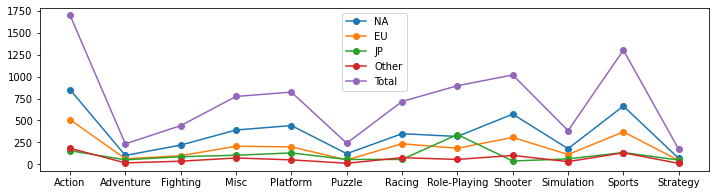

In [ ]:
import matplotlib.pyplot as plt
x= country_genre['Genre']
n= country_genre['NA_Sales']
e = country_genre['EU_Sales']
j = country_genre['JP_Sales']
o = country_genre['Other_Sales']
t = country_genre['Total']
plt.figure(figsize=(12, 3))
plt.plot(x,n,marker="o",label='NA')#북미지역의 장르별 출고량
plt.plot(x,e,marker="o",label='EU')#유럽지역의 장르별 출고량
plt.plot(x,j,marker="o",label='JP')#일본의 장르별 출고량
plt.plot(x,o,marker="o",label='Other')#나머지 지역의 장르별 출고량
plt.plot(x,t,marker="o",label='Total')
plt.legend(loc=0)
#북미에서는 Action 장르의 게임의 판매수치가 높다 
#유럽에서는 Action 장르의 게임의 판매수치가 높다
#일본에서는 Role-Playing 장르 게임의 판매수치가 높다
#각 지역에 따른 장르별 선호도가 다름의 지표로 삼을 수 있다.


<BarContainer object of 5 artists>

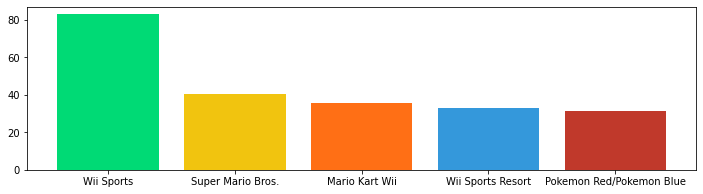

In [ ]:
d_df_sort_value = d_df.sort_values(by=d_df.columns[9],ascending=False)
top_sale = d_df_sort_value.head()
#전체 출고량 TOP5는 모두 닌텐도회사의 게임들이 상위를 차지하고 있다 > 닌텐도사의 게임에서 인기있는 장르를 탐색해볼 필요가 있다
x_val = top_sale['Name']
y_val = top_sale['Whole_Sales']
plt.figure(figsize=(12, 3))
plt.bar(x_val,y_val,color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db','#c0392b'])

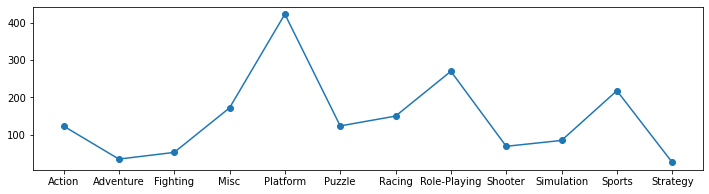

In [ ]:
d_df_sort_value.iloc[0:11,:]
is_nintendo = d_df_sort_value['Publisher'] =='Nintendo'
nintendo = d_df_sort_value[is_nintendo]
nin_genre = nintendo['Whole_Sales'].groupby(nintendo['Genre'])
nin= pd.DataFrame(nin_genre.sum()).reset_index()
xval = nin['Genre']
yval = nin['Whole_Sales']
plt.figure(figsize=(12, 3)),
plt.plot(xval,yval,marker="o")
#닌텐도사는 플랫폼 장르의 게임을 가장 많이 출시한다

In [ ]:
def fix_year(df,col):
  for i in df.index:
    val = df.loc[i,col]
    if val < 22:
      df.loc[i, col] = val+2000
    elif val>22 and val<99:
      df.loc[i, col] = val+1900
fix_year(d_df,'Year')

In [ ]:
def seperate_generation(df,col):
  for i in df.index:
    val = df.loc[i,col]
    if val>=2020 :
     df.loc[i,'Generation']="2020s"
    elif val>=2010 and val<2020 :
     df.loc[i,'Generation']="2010s"
    elif val>=2000 and val<2010 :
     df.loc[i,'Generation']="2000s"
    elif val>=1990 and val<2000 :
     df.loc[i,'Generation']="1990s"
    else :
     df.loc[i,'Generation']="1980s"
seperate_generation(d_df,'Year')
#연대별로 나누어줄 수 있는 Generation 컬럼 추가

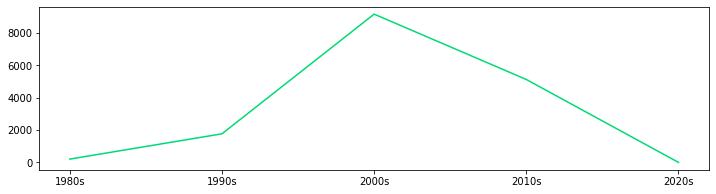

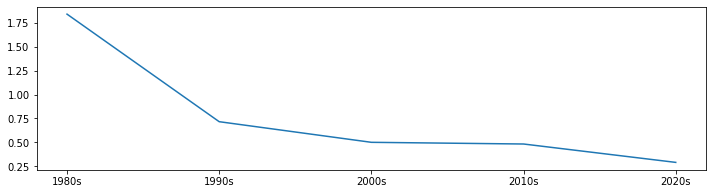

In [ ]:
time=d_df.groupby(d_df['Generation'])
time =pd.DataFrame(time.size())
time = time.reset_index()
time.columns = ['Generation','Size']
g = time['Generation']
h = time['Size']
plt.figure(figsize=(12, 3)),
plt.plot(g,h,c='#00da75')
#2000년대에 게임이 가장 많이 출시되었다
gen_per_sale = pd.DataFrame(d_df['Whole_Sales'].groupby(d_df['Generation']).mean())
gen_per_sale = gen_per_sale.reset_index()
t_val = gen_per_sale['Generation']
s_val = gen_per_sale['Whole_Sales']
plt.figure(figsize=(12, 3)),
plt.plot(t_val,s_val)
#출시된 게임 대비 판매량은 평균적으로 점점 감소하는 경향이 존재한다

In [ ]:
#연도별로 인기 많은 장르를 파악하기
sub_df = d_df.loc[:,'Genre':'Generation']
is_action = d_df['Genre']=='Action'
is_adventure = d_df['Genre']=='Adventure'
is_fighting =d_df['Genre']=='Fighting'
is_misc =d_df['Genre']=='Misc'
is_platform =d_df['Genre']=='Platform'
is_puzzle =d_df['Genre']=='Puzzle'
is_racing =d_df['Genre']=='Racing'
is_roleplaying =d_df['Genre']=='Role-Playing'
is_shooter =d_df['Genre']=='Shooter'
is_sports =d_df['Genre']=='Sports'
is_strategy = d_df['Genre']=='Strategy'
action = d_df[is_action]
adventure = d_df[is_adventure]
fighting = d_df[is_fighting]
misc = d_df[is_misc]
platform = d_df[is_platform]
puzzle = d_df[is_puzzle]
racing = d_df[is_racing]
roleplaying = d_df[is_roleplaying]
shooter = d_df[is_shooter]
sports = d_df[is_sports]
strategy = d_df[is_strategy]

def clear_data(x):
  data = pd.DataFrame(x.groupby(x['Generation']).size())
  data = data.reset_index()
  data.columns = ['Generation','Size']
  return data

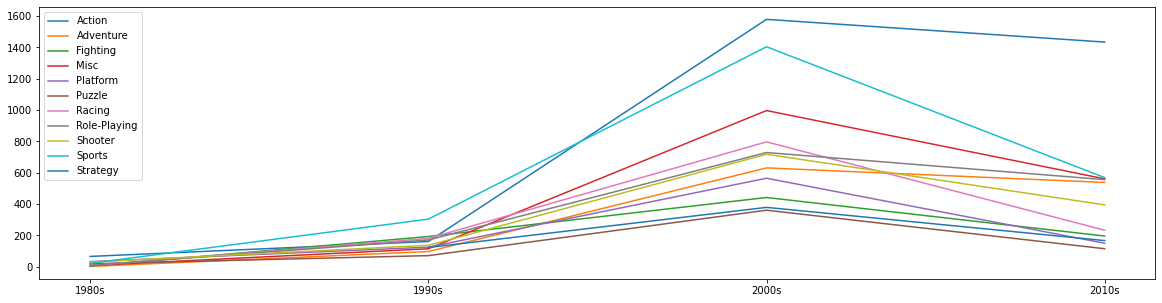

In [ ]:
hor_val = clear_data(action)['Generation']
a_val = clear_data(action)['Size']
ad_val =clear_data(adventure)['Size']
f_val = clear_data(fighting)['Size']
m_val = clear_data(misc)['Size']
p_val = clear_data(platform)['Size']
pu_val = clear_data(puzzle)['Size']
r_value =clear_data(racing)['Size']
ro_value = clear_data(roleplaying)['Size']
s_value = clear_data(shooter)['Size']
sp_value = clear_data(sports)['Size']
st_value = clear_data(strategy)['Size']
plt.figure(figsize=(20, 5))
plt.plot(clear_data(action)['Generation'],a_val,label='Action')
plt.plot(clear_data(action)['Generation'],ad_val,label ='Adventure')
plt.plot(clear_data(action)['Generation'],f_val,label='Fighting')
plt.plot(hor_val,m_val,label='Misc')
plt.plot(hor_val,p_val,label='Platform')
plt.plot(hor_val,pu_val,label='Puzzle')
plt.plot(hor_val,r_value,label='Racing')
plt.plot(hor_val,ro_value,label='Role-Playing')
plt.plot(hor_val,s_value,label='Shooter')
plt.plot(hor_val,sp_value,label='Sports')
plt.plot(clear_data(strategy)['Generation'],st_value,label='Strategy')
plt.legend(loc=0)
#연도별 게임 장르의 트렌드를 보여준다
#액션장르는 추세가 계속 되고있다(출고되는 게임의 갯수)

In [ ]:
Whole_genre = pd.DataFrame((d_df['Whole_Sales'].groupby(d_df['Genre'])).mean())
Whole_genre= Whole_genre.reset_index()
na_genre = pd.DataFrame(d_df['NA_Sales'].groupby(d_df['Genre']).mean())
na_genre= na_genre.reset_index()

In [ ]:
#가설 검증
#H0 : 액션장르와 스포츠장르의 전체출고량의 평균은 같다
#Ha : 액션장르와 스포츠장르의 전체출고량의 평균은 같지않다
import numpy as np
from scipy import stats
act_random = np.random.choice(action['Whole_Sales'],size=20)
sport_random = np.random.choice(sports['Whole_Sales'],size=20)
pv = stats.ttest_ind(act_random,sport_random).pvalue
pv
#p-value가 0.05보다 크므로 귀무가설인 '액션장르와 스포츠장르의 전체출고량의 평균은 같다'는 틀리지 않았다.

0.5095081971708113

In [ ]:
#가설 검증
#H0 : 북미지역의 장르별 판매평균은 유럽지역의 장르별 판매평균과 같다
#Ha : 북미지역의 장르별 판매평균은 유럽지역의 장르별 판매평균과 같지않다
NA_genre['%'] = NA_genre['NA_Sales']/NA_genre['NA_Sales'].sum()*100
EU_genre['%'] = EU_genre['EU_Sales']/EU_genre['EU_Sales'].sum()*100
NA_EU = pd.concat([NA_genre,EU_genre],axis=1)
NA_EU
pv1 = stats.ttest_ind(NA_EU['NA_Sales'],NA_EU['EU_Sales']).pvalue
pv1
#p-value가 0.05보다 크므로 귀무가설인 '북미지역의 장르별 판매평균은 유럽지역의 장르별 판매평균과 같다'는 틀리지 않았다.

0.06458339622570582